<h2 style="text-align: center;"> The Real Time Detection Of Cardiac Arrest Using Machine Learning Techniques</h2>

### Dataset Discription

<p>The dataset is publically available on the Kaggle website. It contains the data of over 4000 residents of the town of Framingham, Massachusetts. The meaning of this dataset is to determine if the patients will suffer at least a CHD (coronary heart disease) or not in ten years.</p>

<p>To be able to reach this goal, for each person there are fifteen attributes divided in three groups: demographic, medical history of the patient and his or her current medical status (such as BMI, heart rate etc). Each attribute is a potential risk factor to determine if the patient will suffer a CHD in ten years.</p>

<p>Here the list of the attributes:</p>

<ol>
    <li>Demographic
        <ul>
            <li>sex: male (value 1) or female (value 0)</li>
            <li>age: Number of years as an integer number</li>
            <li>education: Some High School (value 1); High School Degree or GED (value 2); Some College or Vocational School (value 3); College Degree or Vocational School Degree (value4)</li>
            <li>currentSmoker: Smoker (1) or Nonsmoker (0)</li>
            <li>cigsPerDay: Average number of cigarettes smoked per day as an integer (0 for nonsmokers)</li>
        </ul>
    </li>
    <li>Medical History of the patient
        <ul>
            <li>BPMeds: Whether the patient is on Blood Pressure medications (value 1) or not (value 0)</li>
            <li>prevalentStroke: Whether the patient already had at least a stroke (value 1) or not (value 0)</li>
            <li>prevalentHyp: Whether the patient is hypertensive (value 1) or not (value 0)</li>
            <li>diabetes: Whether the patient has diabetes (value 1) or not (value 0)</li>
        </ul>
    </li>
    <li>Current Medical Status of the patient
        <ul>
            <li>totChol: Float number of the cholesterol measured as mg/dL</li>
            <li>sysBP: Float number of the systolic blood pressure measured as mmHg</li>
            <li>diaBP: Float number of the diastolic blood pressure measured as mmHg</li>
            <li>BMI: Body Mass Index (weight/height$^{2}$) of the patient measured as kg/mt$^{2}$. It is a float number</li>
            <li>heartRate: Beats/Minute. It is an integer number</li>
            <li>glucose: Float number of the quantity of glucose in the patient's blood. Measured as mg/dL</li>
        </ul>
    </li>
</ol>


<p>As we said, this dataset is labeled. The column's name is TenYearCHD. There are two classes:</p>

<ol>
    <li>Class 0: The patient won't have a CHD disease in 10 years.</li>
    <li>Class 1: The patient will have at laest one CHD disease in 10 years.</li>
</ol>

## Requirements

### Python modules

<p>To be able to run this code you will need to install the following modules:</p>

<ol>
    <li>numpy</li>
    <li>pandas</li>
    <li>matplotlib</li>
    <li>seaborn</li>
    <li>scipy</li>
    <li>sklearn</li>
    <li>imbalanced-learn</li>
    <li>prerttytable</li>
    <li>pickle</li>
</ol>

<p>To install them you can either use the conda install command or pip.</p>

## Importing all Libraries

In [2]:
# Data Handline
import numpy as np
import pandas as pd

import warnings

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Scipy
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import zscore
from operator import itemgetter

# Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,auc
from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay,PrecisionRecallDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# DataSet Balancing
from imblearn.over_sampling import SMOTE

# prettytable
from prettytable import PrettyTable

#pickle
import pickle

## Data Analysis

In [3]:
# loading the data from the csv file
cardio_data = pd.read_csv('cvd.csv')
cardio_data.head()

,Unnamed: 0,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,...,sysBP,diaBP,BMI,heartRate,glucose,exerciseAngina,fastingBloodSugar,usesStimulantDrugs,metabolicSyndrome,TenYearCHD
0,0,1,39,4.0,0,0.0,0.0,0,0,0,...,106.0,70.0,26.97,80.0,77.0,0,0,0,0,0
1,1,0,46,2.0,0,0.0,0.0,0,0,0,...,121.0,81.0,28.73,95.0,76.0,1,1,0,0,0
2,2,1,48,1.0,1,20.0,0.0,0,0,0,...,127.5,80.0,25.34,75.0,70.0,1,0,0,0,0
3,3,0,61,3.0,1,30.0,0.0,0,1,0,...,150.0,95.0,28.58,65.0,103.0,0,0,0,0,1
4,4,0,46,3.0,1,23.0,0.0,0,0,0,...,130.0,84.0,23.10,85.0,85.0,0,1,1,1,0


In [4]:
# To display dataSet information
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          4240 non-null   int64  
 1   male                4240 non-null   int64  
 2   age                 4240 non-null   int64  
 3   education           4135 non-null   float64
 4   currentSmoker       4240 non-null   int64  
 5   cigsPerDay          4211 non-null   float64
 6   BPMeds              4187 non-null   float64
 7   prevalentStroke     4240 non-null   int64  
 8   prevalentHyp        4240 non-null   int64  
 9   diabetes            4240 non-null   int64  
 10  totChol             4190 non-null   float64
 11  sysBP               4240 non-null   float64
 12  diaBP               4240 non-null   float64
 13  BMI                 4221 non-null   float64
 14  heartRate           4239 non-null   float64
 15  glucose             3852 non-null   float64
 16  exerci

## Data Pre-processing and Exploratory Data Analysis(EDA)

In [ ]:
# Displaying the DataSet shape, missing values count
print('Number of Rows: ',cardio_data.shape[0])
print('Number of Columns: ',cardio_data.shape[1])
num_of_entries = cardio_data.shape[0]*cardio_data.shape[1]
print('Number of entries in dataFrame: ',num_of_entries)

num_of_missing_values = cardio_data.isna().sum().sum()
print('Number of missing values: ',num_of_missing_values)

Number of Rows:  4240
Number of Columns:  16
Number of entries in dataFrame:  67840
Number of missing values:  645


In [ ]:
# removing all duplicated rows
cardio_data=cardio_data.drop_duplicates()

In [ ]:
# statistical summery of dataset
cardio_data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.125236
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.331025
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
# rename of dataset columns 
cardio_data.rename(columns={'male':'gender','currentSmoker':'smoking','cigsPerDay':'cigarettes/day','BPMeds':'BP_meds',
                   'prevalentStroke':'stroke','prevalentHyp':'hypertensive',
                   'totChol':'cholesterol','sysBP':'ap_hi','diaBP':'ap_lo',
                   'heartRate':'HR','TenYearCHD':'cardio'},
          inplace = True)
cardio_data.head()

,gender,age,education,smoking,cigarettes/day,BP_meds,stroke,hypertensive,diabetes,cholesterol,ap_hi,ap_lo,BMI,HR,glucose,cardio
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,1
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,1


In [ ]:
# checking the missing values in the dataset
for i in cardio_data.columns.tolist():
  print("Total missing values in",i,":",cardio_data[i].isna().sum())

Total missing values in gender : 0
Total missing values in age : 0
Total missing values in education : 105
Total missing values in smoking : 0
Total missing values in cigarettes/day : 29
Total missing values in BP_meds : 53
Total missing values in stroke : 0
Total missing values in hypertensive : 0
Total missing values in diabetes : 0
Total missing values in cholesterol : 50
Total missing values in ap_hi : 0
Total missing values in ap_lo : 0
Total missing values in BMI : 19
Total missing values in HR : 1
Total missing values in glucose : 388
Total missing values in cardio : 0


In [ ]:
# removing missing values rows in a dataset
cardio_data.dropna(subset=['education','cigarettes/day','BP_meds','cholesterol','BMI','HR','glucose'],inplace= True)

In [ ]:
# checking dataset shape after removing missing values
cardio_data.shape

(3658, 16)

## Outlier detection

According the figure below we can assume values larger than 280 mm Hg and 120 mm Hg for ap_hi and ap_lo respectively will be dropped as outliers.As well as negative values because they can not be negative.

<img src="https://th.bing.com/th/id/OIP.qRfkAn9Ab0hehEjgru8XDgHaD1?pid=ImgDet&rs=1" width=500 height=300>

In [ ]:
outliers = len(cardio_data[(cardio_data["ap_hi"]>=280) | (cardio_data["ap_lo"]>=220) | (cardio_data["ap_lo"] < 0) | 
                           (cardio_data["ap_hi"] < 0) | (cardio_data["ap_hi"]<cardio_data["ap_lo"])])
outliers += len(cardio_data[(cardio_data["fastingBloodSugar"]>=200) | (cardio_data["fastingBloodSugar"]<=10)])
print(f'we have total {outliers} outliers')
print(f'percent missing: {round(outliers/len(cardio_data)*100,1)}%')

we have total 1 outliers
percent missing: 0.0%


In [ ]:
#Filtering out the unrealistic data of Systolic blood pressure and Diastolic blood pressure
cardio_data = cardio_data[ (cardio_data['ap_lo'] >= 0) & (cardio_data['ap_hi'] >= 0) ]  #remove negative values
cardio_data = cardio_data[ (cardio_data['ap_lo'] <= 220) & (cardio_data['ap_hi'] <= 280) ]  #remove fishy data points
cardio_data = cardio_data[ (cardio_data['ap_lo'] < cardio_data['ap_hi']) ]  #remove systolic higher than diastol

## Inter Quartile Range (IQR)

In [ ]:
# Q1_hi = cardio_data['ap_hi'].quantile(0.05) # 5th percentile of the data of the given feature
# Q3_hi = cardio_data['ap_hi'].quantile(0.95)  # 95th percentile of the data of the given feature
# IQR_hi = Q3_hi - Q1_hi
# lower, upper = Q1_hi - 1.5 * IQR_hi, Q3_hi + 1.5 * IQR_hi
# cardio_data = cardio_data[(cardio_data['ap_hi'] >= lower) & (cardio_data['ap_hi'] <= upper)]  
# print(lower,upper)
# Q1_lo = cardio_data['ap_lo'].quantile(0.05) # 5th percentile of the data of the given feature
# Q3_lo = cardio_data['ap_lo'].quantile(0.95)  # 95th percentile of the data of the given feature
# IQR_lo = Q3_lo - Q1_lo
# lower, upper = Q1_lo - 1.5 * IQR_lo, Q3_lo + 1.5 * IQR_lo
# cardio_data = cardio_data[(cardio_data['ap_lo'] >= lower) & (cardio_data['ap_lo'] <= upper)]  

# print(lower,upper)

In [ ]:
# import seaborn as sns
# sns.jointplot(x='ap_hi', y='ap_lo', data=cardio_data);

## BMI filtering

<img src="https://1.bp.blogspot.com/-d8zqhTJtvfQ/XisQKpQHIcI/AAAAAAAAAbE/hdwbjA0v3d030YgE-KUlR9-GZOc39Q_mQCEwYBhgL/s1600/Teen%2BBMI%2Bcalculator%2Bby%2BShreysoft.png" width=700 height=700>

In [ ]:
#Filtering out the extreme values (unhealthy health) of BMI data according to BMI chart above

cardio_data = cardio_data[ (cardio_data['BMI'] < 60) & (cardio_data['BMI'] > 10)]

In [ ]:
#Dataset after cleaning
print(f'Number of rows of cardio dataset after data preprocessing: {len(cardio_data)}')
print(f'How much percent missing: {round((4240-len(cardio_data))/4240*100,2)}%')

Number of rows of cardio dataset after data preprocessing: 3657
How much percent missing: 13.75%


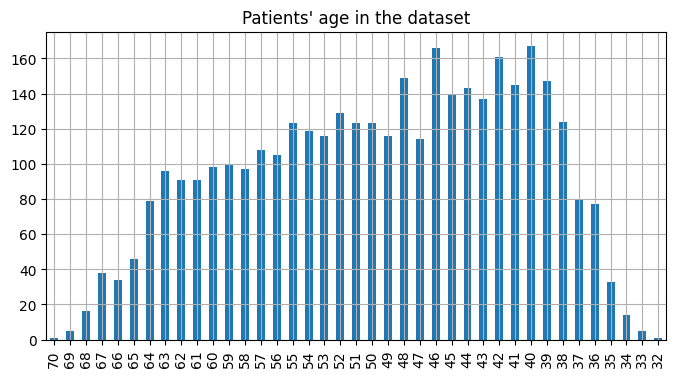

In [ ]:
# Plotttinf a bargraph of patients age dataset
plt.figure(figsize=(8,4))
plt.title('Patients\' age in the dataset')
counts = cardio_data['age'].value_counts().sort_index(ascending=False).plot.bar()
plt.grid()
plt.savefig('age data.png')

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

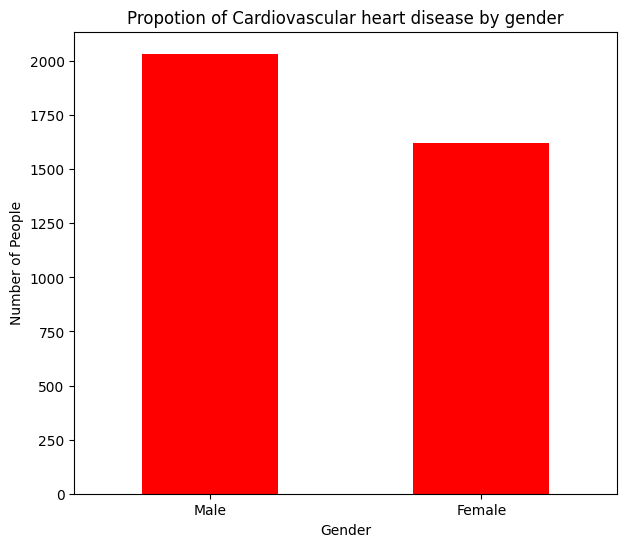

In [ ]:
#Distribution of cardiovascular heart disease by gender
gender = cardio_data['gender'].value_counts()
plt.figure(figsize=(7, 6))
ax = gender.plot(kind='bar', rot=0, color="r")
ax.set_title("Propotion of Cardiovascular heart disease by gender", y = 1)
ax.set_xlabel('Gender')
ax.set_ylabel('Number of People')
ax.set_xticklabels(('Male', 'Female'))

# Feature Engineering

In [ ]:
# Finding correlation using with statistical methods
columns = cardio_data.columns
corr_arr= []

# PEARSON
for i in range(len(columns)):
    for j in range(i,len(columns)):
        if i!=j:
            corr_arr.append([columns[i], columns[j], \
                             pearsonr(cardio_data[columns[i]],cardio_data[columns[j]])[0], \
                             spearmanr(cardio_data[columns[i]],cardio_data[columns[j]])[0], \
                             kendalltau(cardio_data[columns[i]],cardio_data[columns[j]])[0]])

In [ ]:

def print_correlations(data):
    for el in data:
        print("{} and {}: {:.2f}".format(el[0], el[1], el[2]))

corr_arr = sorted(corr_arr, key=itemgetter(2))
pearson_getter = itemgetter(0, 1, 2) 
pearsons = list(map(list, map(pearson_getter, corr_arr)))

print("PEARSON\n")

print("5 most inversely correlated")
print_correlations(pearsons[0:5])
print("\n\n")
print("5 most directly correlated")
pearsons.reverse()
print_correlations(pearsons[0:5])
print("\n\n")

corr_arr = sorted(corr_arr, key=itemgetter(3))
spearman_getter = itemgetter(0, 1, 3) 
spearmans = list(map(list, map(spearman_getter, corr_arr)))

print("SPEARMAN\n")

print("5 most inversely correlated")
print_correlations(spearmans[0:5])
print("\n\n")
print("5 most directly correlated")
spearmans.reverse()
print_correlations(spearmans[0:5])
print("\n\n")

corr_arr = sorted(corr_arr, key=itemgetter(4))
kendall_getter = itemgetter(0, 1, 4) 
kendall = list(map(list, map(kendall_getter, corr_arr)))

print("KENDALL\n")

print("5 most inversely correlated")
print_correlations(kendall[0:5])
print("\n\n")
print("5 most directly correlated")
kendall.reverse()
print_correlations(kendall[0:5])
print("\n\n")

PEARSON

5 most inversely correlated
age and smoking: -0.21
age and cigarettes/day: -0.19
smoking and BMI: -0.16
age and education: -0.16
education and BMI: -0.14



5 most directly correlated
ap_hi and ap_lo: 0.79
smoking and cigarettes/day: 0.77
hypertensive and ap_hi: 0.70
hypertensive and ap_lo: 0.62
diabetes and glucose: 0.61



SPEARMAN

5 most inversely correlated
age and cigarettes/day: -0.21
age and smoking: -0.21
age and education: -0.18
smoking and BMI: -0.17
education and BMI: -0.14



5 most directly correlated
smoking and cigarettes/day: 0.93
ap_hi and ap_lo: 0.78
hypertensive and ap_hi: 0.70
hypertensive and ap_lo: 0.62
age and ap_hi: 0.39



KENDALL

5 most inversely correlated
age and smoking: -0.17
age and cigarettes/day: -0.16
age and education: -0.14
smoking and BMI: -0.14
smoking and ap_hi: -0.11



5 most directly correlated
smoking and cigarettes/day: 0.85
ap_hi and ap_lo: 0.60
hypertensive and ap_hi: 0.57
hypertensive and ap_lo: 0.51
gender and cardio: 0.35





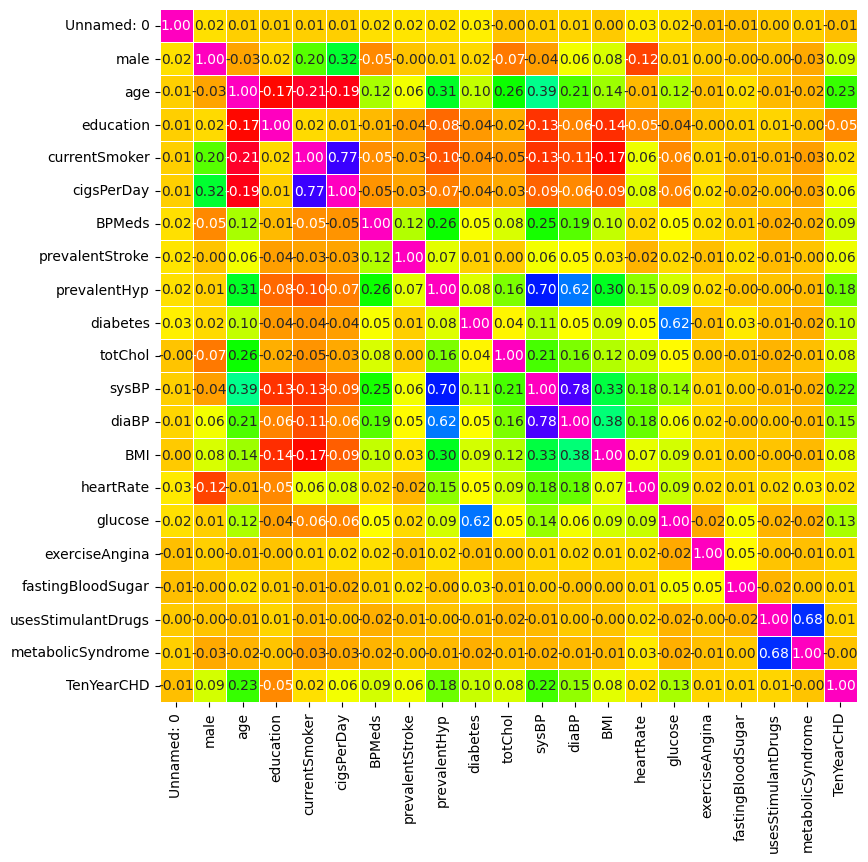

In [5]:

f, ax = plt.subplots(figsize=(9, 9))
# plt.title("pearson")
sns.heatmap(cardio_data.corr(),linewidths=.5,annot=True,ax=ax,cbar=False,fmt='.2f',cmap='gist_rainbow')
# plt.savefig('pearson.png')
plt.show()


In [ ]:
# f, ax = plt.subplots(figsize=(14, 14))
# plt.title("spearman")
# sns.heatmap(cardio_data.corr(method='spearman'),linewidths=.5,annot=True,ax=ax,cbar=False)
# plt.show()

In [ ]:
# f, ax = plt.subplots(figsize=(14, 14))
# plt.title("kendall")
# sns.heatmap(cardio_data.corr(method='kendall'),linewidths=.5,annot=True,ax=ax,cbar=False)
# plt.show()

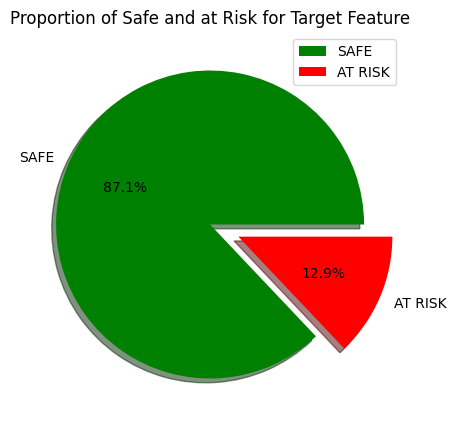

In [ ]:
# Proportion of Safe and at Risk for Target Feature
plt.figure(figsize=(7,5), dpi=100)
proportion = cardio_data['cardio'].value_counts()
labels = ['SAFE','AT RISK']
plt.title('Proportion of Safe and at Risk for Target Feature')
plt.pie(proportion, explode=(0,0.2),labels=labels, shadow = True, autopct = '%1.1f%%', colors= ['green','red'])
plt.legend()
plt.show()

In [ ]:
# cardic arrest occured count and not occured count
df = pd.DataFrame(cardio_data,columns=['cardio'])
df['cardio'].groupby(df['cardio']).count()

cardio
0    3184
1     473
Name: cardio, dtype: int64

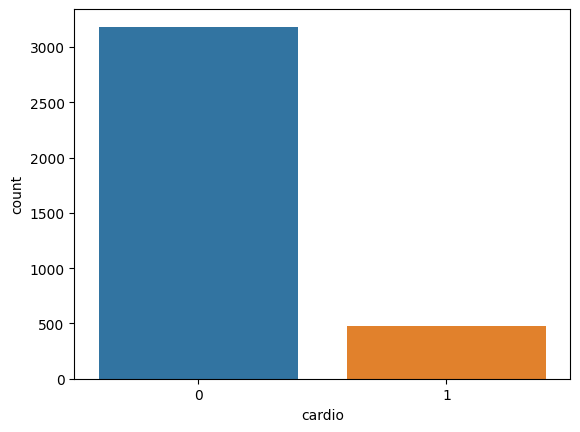

In [ ]:
# plotting counterplot for the target value 
sns.countplot(x='cardio',data=df)
plt.savefig('before_oversample.png')

In [ ]:
# cardio_data[['gender','age','smoking','stroke','hypertensive','ap_hi','ap_lo','BMI','HR','glucose','cardio']]

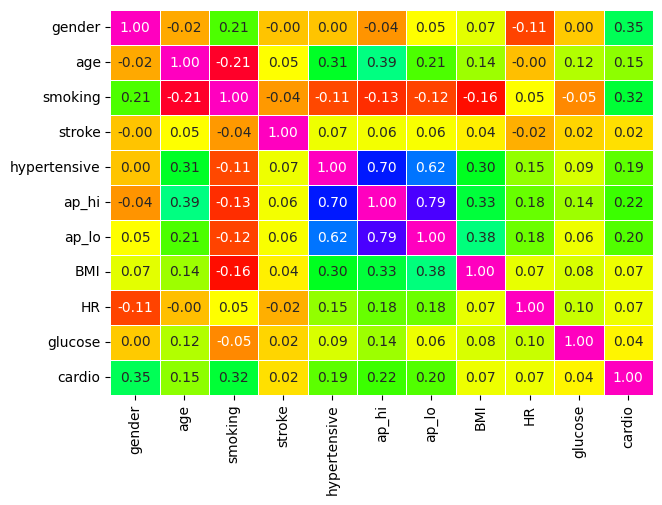

In [ ]:
# after removing same correlation values then correlation matrix plot
f, ax = plt.subplots(figsize=(7, 5))
# plt.title("pearson")
sns.heatmap(cardio_data[['gender','age','smoking','stroke','hypertensive','ap_hi','ap_lo','BMI','HR','glucose','metabolicSyndrome','usesStimulantDrugs','fastingBloodSugar','exerciseAngina','cardio']].corr(),linewidths=.5,annot=True,ax=ax,cbar=False,fmt='.2f',cmap='gist_rainbow')
plt.savefig('pearson_1.png')
plt.show()

## ML Model

In [ ]:
# res_df=pd.DataFrame()
# Y = cardio_data['cardio'].values
# X = cardio_data.drop(['cardio','cholesterol','BP_meds','education','diabetes','cigarettes/day'],axis=1).values

# x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

In [ ]:
# x1,y1 = x_test,y_test

In [ ]:
# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)

## LogisticRegression

In [ ]:
# from sklearn.linear_model import LogisticRegression

# lgr=LogisticRegression(solver='newton-cg').fit(x_train,y_train)
# prediction = lgr.predict(x_test)
# print('Accuracy of Logistic Regression:',accuracy_score(y_test,prediction)*100)

# cm = confusion_matrix(y_test,prediction)
# print('Confusion matrix of Logistic Regresssion model:')
# # ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lgr.classes_).plot()
# ConfusionMatrixDisplay.from_predictions(y_test,prediction)
# plt.title('Logistic Regression')
# plt.show()


In [ ]:
# dict_1 = classification_report(y_test, prediction, output_dict = True)
# dict_1
# #Adding results to model evaluation dataframe.
# tempodf=pd.DataFrame(dict_1).transpose()
# # tempodf['Model'] = 'Logistic Regression Classifier'
# tempodf
# # res_df=res_df.append(tempodf[2:-2])
# # res_df


## Gradient Boosting Classifier

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier

# gbc=GradientBoostingClassifier().fit(x_train,y_train)
# pred=gbc.predict(x_test)
# print('Accuracy of Gradient Boosting Classifier:',accuracy_score(y_test,pred)*100)
# print('Confusion matrix of Gradient Boosting classifier model:')
# ConfusionMatrixDisplay.from_predictions(y_test,pred)
# plt.title('Gradient Boosting classifier')
# plt.show()

In [ ]:
# dict_1 = classification_report(y_test,pred, output_dict = True)
# #Adding results to model evaluation dataframe.
# tempodf=pd.DataFrame(dict_1).transpose()
# tempodf['Model'] = 'Gradient Boosting classifier'
# res_df=res_df.append(tempodf[2:-2])
# res_df

## RandomForestClassifier

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# rfc = RandomForestClassifier().fit(x_train,y_train)
# print('Accuracy of Random Forrest Classifier:',accuracy_score(y_test,rfc.predict(x_test))*100)
# print('Confusion matrix of Random Forest Classifier model:')
# ConfusionMatrixDisplay.from_predictions(y_test,rfc.predict(x_test))
# plt.title('Random Forest Classifier')
# plt.show()

In [ ]:
# dict_1 = classification_report(y_test, rfc.predict(x_test), output_dict = True)
# #Adding results to model evaluation dataframe.
# tempodf=pd.DataFrame(dict_1).transpose()
# tempodf['Model'] = 'Random Forest classifier'
# res_df=res_df.append(tempodf[2:-2])
# res_df

## Decision Tree Classifier

In [ ]:
# from sklearn.tree import DecisionTreeClassifier

# dtc = DecisionTreeClassifier().fit(x_train,y_train)
# print('Accuracy of Decision Tree Classifier:',accuracy_score(y_test,dtc.predict(x_test))*100)
# print('Confusion matrix of Decision Tree Classifier model:')
# ConfusionMatrixDisplay.from_predictions(y_test,dtc.predict(x_test))
# plt.title('Decision Tree Classifier')
# plt.show()

In [ ]:
# dict_1 = classification_report(y_test, dtc.predict(x_test), output_dict = True)
# #Adding results to model evaluation dataframe.
# tempodf=pd.DataFrame(dict_1).transpose()
# tempodf['Model'] = 'Decision tree classifier'
# res_df=res_df.append(tempodf[2:-2])
# res_df

## Support Vector Machine

In [ ]:
# from sklearn.svm import SVC

# svm_ = SVC().fit(x_train,y_train)
# print('Accuracy of support vector machine:',accuracy_score(y_test,svm_.predict(x_test))*100)
# print('Confusion matrix of support vector machine model:')
# ConfusionMatrixDisplay.from_predictions(y_test,svm_.predict(x_test))
# plt.title('support vector machine')
# plt.show()

In [ ]:
# dict_1 = classification_report(y_test, svm_.predict(x_test), output_dict = True)
# #Adding results to model evaluation dataframe.
# tempodf=pd.DataFrame(dict_1).transpose()
# tempodf['Model'] = 'support vector machine'
# res_df=res_df.append(tempodf[2:-2])
# res_df

## KNeighborsClassifier

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV

# KNN_clf = KNeighborsClassifier()
# parameters = {'n_neighbors':np.arange(1,10)}
# cv_knn = GridSearchCV(KNN_clf, cv = 5, param_grid = parameters)
# cv_knn.fit(x_train, y_train)
# cv_knn.best_estimator_
# print('Accuracy of KNeighborsClassifier:',accuracy_score(y_test,cv_knn.predict(x_test))*100)
# print('Confusion matrix of KNeighborsClassifier model:')
# ConfusionMatrixDisplay.from_predictions(y_test,cv_knn.predict(x_test))
# plt.title('KNeighborsClassifier')
# plt.show()

In [ ]:
# dict_1 = classification_report(y_test, cv_knn.predict(x_test), output_dict = True)
# #Adding results to model evaluation dataframe.
# tempodf=pd.DataFrame(dict_1).transpose()
# tempodf['Model'] = 'KNN classifier'
# res_df=res_df.append(tempodf[2:-2])
# res_df

## **Scaling:**

***Scaling the Numerical Variables with StandardScaler.***


*StandardScaler is used to resize the distribution of values ​​so that the mean of the observed values ​​is 0 and the standard deviation is 1.*

In [ ]:
#Applying normalization operation for numeric stability
standardizer = StandardScaler()
dataset = cardio_data
columns_to_scale =  ['age','ap_hi','ap_lo','BMI','HR','glucose','metabolicSyndrome','usesStimulantDrugs','fastingBloodSugar','exerciseAngina']
dataset[columns_to_scale] = standardizer.fit_transform(dataset[columns_to_scale])

## **Splitting The Data**

***Train Test Split:*** *The train-test split is a technique for evaluating the performance of a machine learning algorithm.
It can be used for classification or regression problems and can be used for any supervised learning algorithm.The procedure involves taking a dataset and dividing it into two subsets.*

In [ ]:
#applying the train_and_test split method here we used 80:10
Y = dataset['cardio'].values
X = dataset.drop(['cardio','cholesterol','BP_meds','education','diabetes','cigarettes/day'],axis=1).values
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

In [ ]:
df = pd.DataFrame(y_train,columns=['cardio'])
df['cardio'].groupby(df['cardio']).count()

cardio
0    2547
1     378
Name: cardio, dtype: int64

<Axes: xlabel='cardio', ylabel='count'>

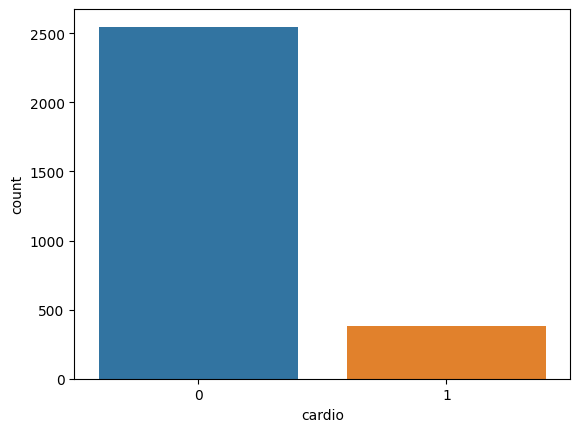

In [ ]:
sns.countplot(x='cardio', data=df)
# plt.savefig('databalanced1.png')

## Handling Imbalanced Data


In [ ]:
#Using SMOTE for oversampling
# Creating the instance
smote = SMOTE(random_state = 42)

In [ ]:
# fit predictor and target variable
x_train_sm, y_train_sm = smote.fit_resample(X, Y)

In [ ]:
# checking the length of our train set before and after handeling imbalance.
print('Original dataset shape', len(x_train))
print('Resampled dataset shape', len(x_train_sm))

Original dataset shape 2925
Resampled dataset shape 6368


In [ ]:
# After smote analysis
df = pd.DataFrame(y_train_sm,columns=['cardio'])
df['cardio'].groupby(df['cardio']).count()

cardio
0    3184
1    3184
Name: cardio, dtype: int64

<Axes: xlabel='cardio', ylabel='count'>

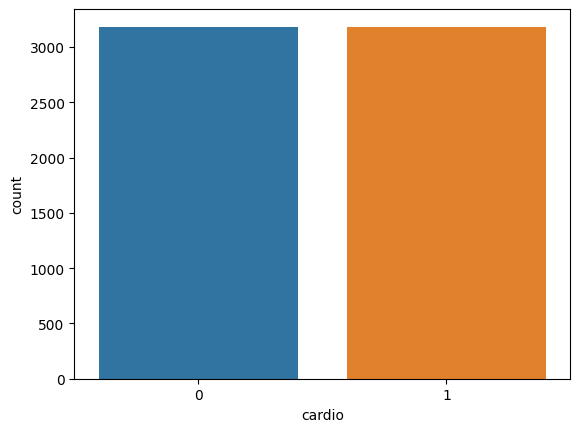

In [ ]:
# counter plot after oversampling of target valuse
sns.countplot(x='cardio', data=df)
# plt.savefig('databalanced.png')

# LogisticRegression

Accuracy of Logistic Regression: 84.01639344262296
Confusion matrix of Logistic Regresssion model:


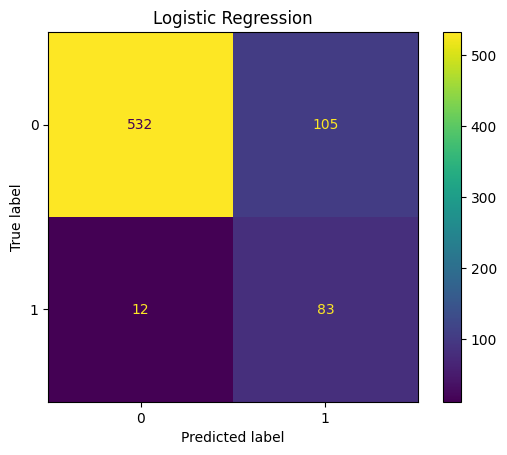

In [ ]:
# clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf=LogisticRegression(solver='newton-cg').fit(x_train_sm,y_train_sm)
prediction = clf.predict(x_test)
print('Accuracy of Logistic Regression:',accuracy_score(y_test,prediction)*100)
cm = confusion_matrix(y_test,prediction)
print('Confusion matrix of Logistic Regresssion model:')
# ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lgr.classes_).plot()
ConfusionMatrixDisplay.from_predictions(y_test,prediction)
plt.title('Logistic Regression')
plt.show()

In [ ]:
# Stratified K- fold cross validation

# skfold = StratifiedKFold(n_splits=5)
# scores = cross_val_score(clf,X,Y,cv=skfold)
# print(scores)
# print(np.mean(scores))

In [ ]:
# classification report for Logistic Regression
# dict_1 = classification_report(y_test,prediction, output_dict = True)
# df = pd.DataFrame(dict_1).T
# df
print(classification_report(y_test,prediction.round()))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       637
           1       0.44      0.87      0.59        95

    accuracy                           0.84       732
   macro avg       0.71      0.85      0.74       732
weighted avg       0.91      0.84      0.86       732



# GradientBoostingClassifier

Accuracy of Gradient Boosting Classifier: 91.80327868852459
Confusion matrix of Gradient Boosting classifier model:


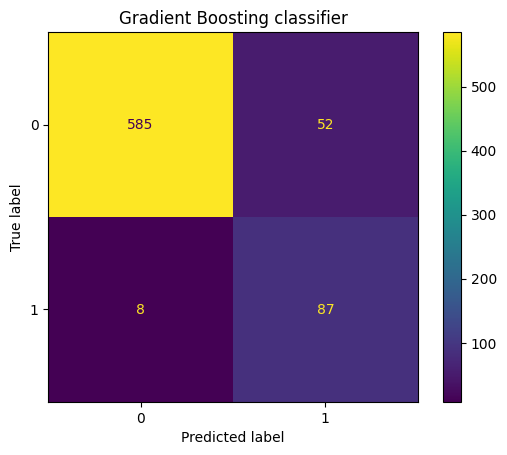

In [ ]:
gbc=GradientBoostingClassifier().fit(x_train_sm,y_train_sm)
pred=gbc.predict(x_test)
print('Accuracy of Gradient Boosting Classifier:',accuracy_score(y_test,gbc.predict(x_test))*100)
print('Confusion matrix of Gradient Boosting classifier model:')
ConfusionMatrixDisplay.from_predictions(y_test,pred)
plt.title('Gradient Boosting classifier')
plt.show()

In [ ]:
# Stratified K- fold cross validation

# skfold = StratifiedKFold(n_splits=5)
# scores = cross_val_score(gbc,X,Y,cv=skfold)
# print(np.mean(scores))

In [ ]:
# classification report for GradientBoostingClassifier 
# dict_1 = classification_report(y_test,pred, output_dict = True)
# df = pd.DataFrame(dict_1).T
# df
print(classification_report(y_test,pred.round()))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       637
           1       0.63      0.92      0.74        95

    accuracy                           0.92       732
   macro avg       0.81      0.92      0.85       732
weighted avg       0.94      0.92      0.92       732



# RandomForestClassifier

Accuracy of Random Forrest Classifier: 100.0
Confusion matrix of Random Forest Classifier model:


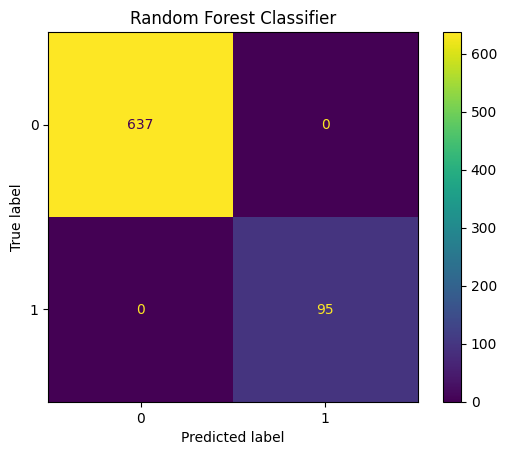

In [ ]:
rfc = RandomForestClassifier().fit(x_train_sm,y_train_sm)
print('Accuracy of Random Forrest Classifier:',accuracy_score(y_test,rfc.predict(x_test))*100)
print('Confusion matrix of Random Forest Classifier model:')
ConfusionMatrixDisplay.from_predictions(y_test,rfc.predict(x_test))
plt.title('Random Forest Classifier')
plt.show()

In [ ]:
# Stratified K- fold cross validation

# skfold = StratifiedKFold(n_splits=5)
# scores = cross_val_score(rfc,X,Y,cv=skfold)
# print(np.mean(scores))

In [ ]:
print(classification_report(y_test, rfc.predict(x_test).round()))
# classification report for Random Forest Classifier
# dict_1 = classification_report(y_test,prediction, output_dict = True)
# df = pd.DataFrame(dict_1).T
# df

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       637
           1       1.00      1.00      1.00        95

    accuracy                           1.00       732
   macro avg       1.00      1.00      1.00       732
weighted avg       1.00      1.00      1.00       732



# DecisionTreeClassifier

Accuracy of Decision Tree Classifier: 100.0
Confusion matrix of Decision Tree Classifier model:


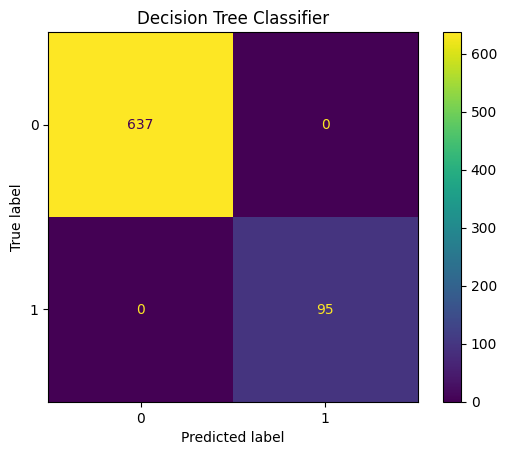

In [ ]:
dtc = DecisionTreeClassifier().fit(x_train_sm,y_train_sm)
print('Accuracy of Decision Tree Classifier:',accuracy_score(y_test,dtc.predict(x_test))*100)
print('Confusion matrix of Decision Tree Classifier model:')
ConfusionMatrixDisplay.from_predictions(y_test,dtc.predict(x_test))
plt.title('Decision Tree Classifier')
plt.show()

In [ ]:
# Stratified K- fold cross validation

# skfold = StratifiedKFold(n_splits=5)
# scores = cross_val_score(dtc,X,Y,cv=skfold)
# print(np.mean(scores))

In [ ]:
# classification report for Decision Tree
# dict_1 = classification_report(y_test,prediction, output_dict = True)
# dict_1
print(classification_report(y_test,dtc.predict(x_test).round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       637
           1       1.00      1.00      1.00        95

    accuracy                           1.00       732
   macro avg       1.00      1.00      1.00       732
weighted avg       1.00      1.00      1.00       732



# Support Vector Machine

Accuracy of support vector machine: 86.74863387978142
Confusion matrix of support vector machine model:


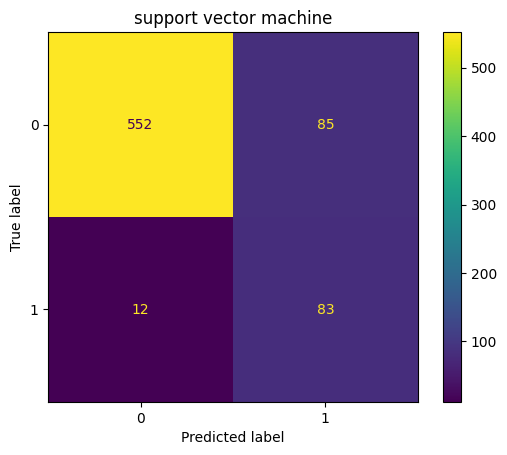

In [ ]:
svm_ = SVC(probability=True).fit(x_train_sm,y_train_sm)
print('Accuracy of support vector machine:',accuracy_score(y_test,svm_.predict(x_test))*100)
print('Confusion matrix of support vector machine model:')
ConfusionMatrixDisplay.from_predictions(y_test,svm_.predict(x_test))
plt.title('support vector machine')
plt.show()

In [ ]:
# Stratified K- fold cross validation

# skfold = StratifiedKFold(n_splits=5)
# scores = cross_val_score(svm_,X,Y,cv=skfold)
# print(np.mean(scores))

In [ ]:
# classification_report for Support Vactor Machine
# dict_1 = classification_report(y_test, svm_.predict(x_test), output_dict = True)
# dict_1
print(classification_report(y_test,svm_.predict(x_test).round()))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       637
           1       0.49      0.87      0.63        95

    accuracy                           0.87       732
   macro avg       0.74      0.87      0.78       732
weighted avg       0.92      0.87      0.88       732



# KNeighborsClassifier

Accuracy of knn: 99.86338797814209
Confusion matrix of knn model:


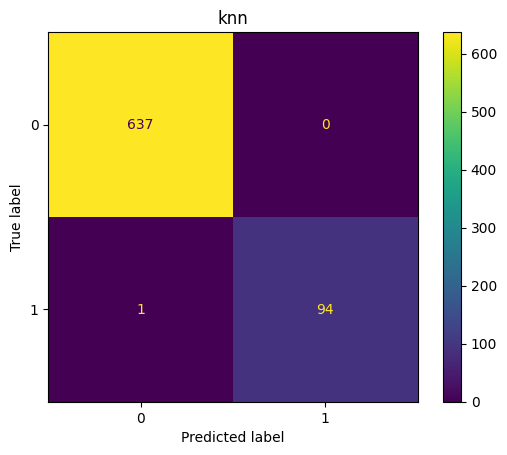

In [ ]:
from sklearn.model_selection import GridSearchCV
KNN_clf = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,10)}
cv_knn = GridSearchCV(KNN_clf, cv = 5, param_grid = parameters)
cv_knn.fit(x_train_sm, y_train_sm)
cv_knn.best_estimator_
print('Accuracy of knn:',accuracy_score(y_test,cv_knn.predict(x_test))*100)
print('Confusion matrix of knn model:')
ConfusionMatrixDisplay.from_predictions(y_test,cv_knn.predict(x_test))
plt.title('knn')
plt.show()

In [ ]:
# Stratified K- fold cross validation

# skfold = StratifiedKFold(n_splits=5)
# scores = cross_val_score(svm_,X,Y,cv=skfold)
# print(np.mean(scores))

In [ ]:
# classification_report for KNN
# dict_1 = classification_report(y_test, cv_knn.predict(x_test), output_dict = True)
# dict_1
print(classification_report(y_test,cv_knn.predict(x_test).round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       637
           1       1.00      0.99      0.99        95

    accuracy                           1.00       732
   macro avg       1.00      0.99      1.00       732
weighted avg       1.00      1.00      1.00       732



In [ ]:
## plotting varios 

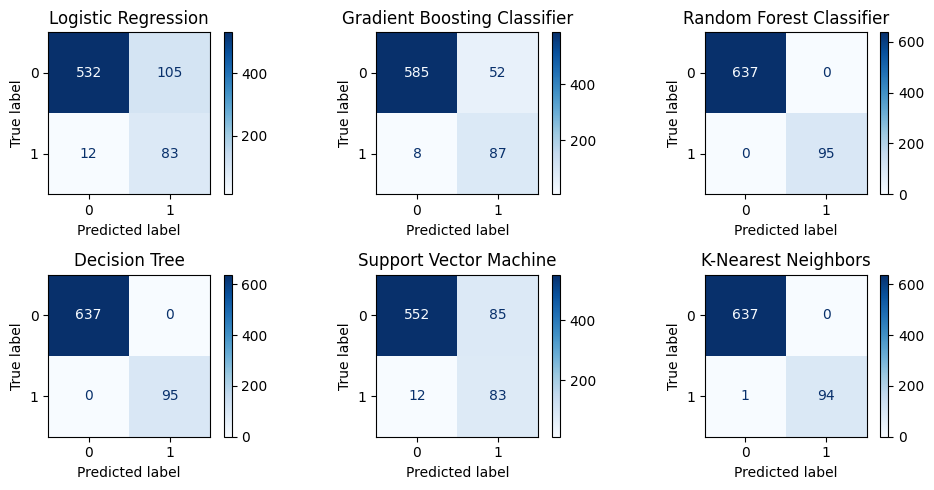

In [ ]:
classifiers = [clf,gbc,rfc,dtc,svm_,cv_knn]
titles = ['Logistic Regression', 'Gradient Boosting Classifier', 'Random Forest Classifier', 'Decision Tree', 'Support Vector Machine', 'K-Nearest Neighbors']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

for i, clf in enumerate(classifiers):
    row = i // 3
    col = i % 3
    clf.fit(x_train_sm, y_train_sm)
    pred = clf.predict(x_test)
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
    disp.plot(ax=axs[row][col], values_format='d', cmap='Blues', colorbar=True)
    axs[row][col].set_title(titles[i])

plt.tight_layout()
# plt.savefig('confusion_matrix1.png')
plt.show()


## Roc curves with different Algorithms

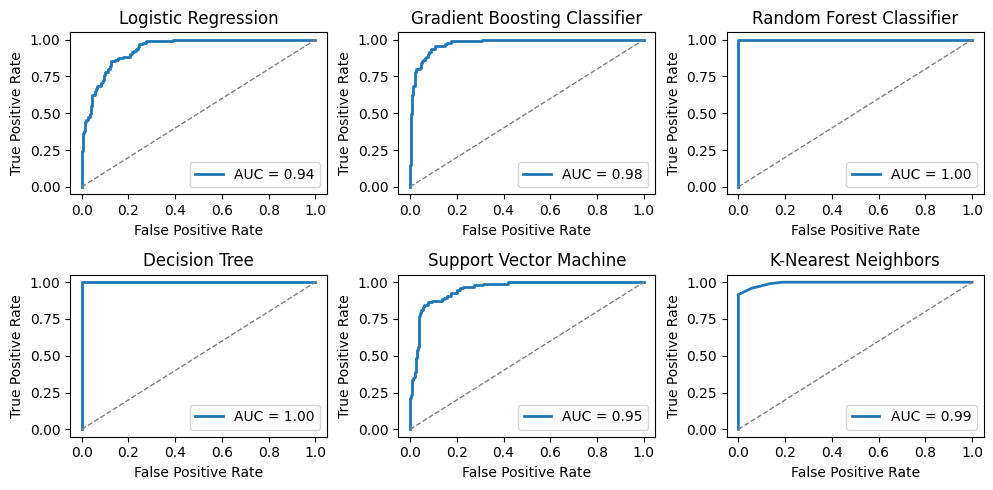

In [ ]:
classifiers = [LogisticRegression(solver='newton-cg'), GradientBoostingClassifier(), RandomForestClassifier(), DecisionTreeClassifier(), SVC(probability=True), KNeighborsClassifier()]
titles = ['Logistic Regression', 'Gradient Boosting Classifier', 'Random Forest Classifier', 'Decision Tree', 'Support Vector Machine', 'K-Nearest Neighbors']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

for i, clf in enumerate(classifiers):
    row = i // 3
    col = i % 3    
    # Plot ROC curve
    clf.fit(x_train_sm, y_train_sm)
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
    roc_auc = auc(fpr, tpr)
    axs[row][col].plot(fpr, tpr, lw=2, label='AUC = %0.2f' % roc_auc)
    axs[row][col].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    axs[row][col].set_xlim([-0.05, 1.05])
    axs[row][col].set_ylim([-0.05, 1.05])
    axs[row][col].set_xlabel('False Positive Rate')
    axs[row][col].set_ylabel('True Positive Rate')
    axs[row][col].set_title(titles[i])
    axs[row][col].legend(loc="lower right")

plt.tight_layout()
# plt.savefig('aoc_or_roc.png')
plt.show()


## ROC Curve Comparison with different algorithms

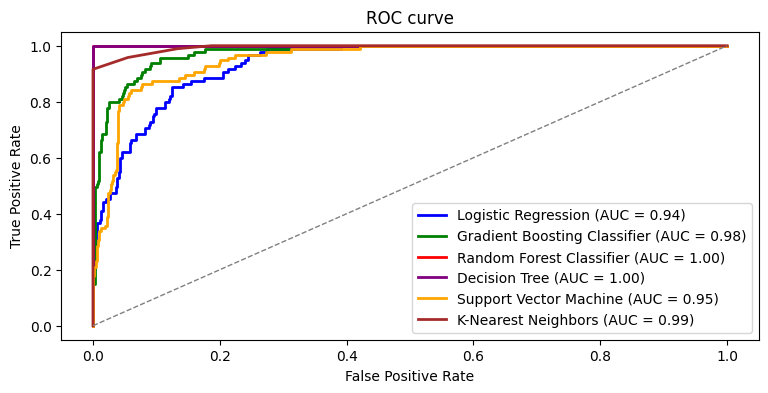

In [ ]:
classifiers = [LogisticRegression(solver='newton-cg'),GradientBoostingClassifier(),RandomForestClassifier(),DecisionTreeClassifier(),SVC(probability=True), KNeighborsClassifier()]
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']
titles = ['Logistic Regression', 'Gradient Boosting Classifier', 'Random Forest Classifier', 'Decision Tree', 'Support Vector Machine', 'K-Nearest Neighbors']

# Plot all ROC curves on the same set of axes
plt.figure(figsize=(9, 4))
for i, clf in enumerate(classifiers):
    clf.fit(x_train_sm, y_train_sm)
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, color=colors[i], label='%s (AUC = %0.2f)' % (titles[i], roc_auc))

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
# plt.savefig('roc1.png')
plt.show()


## Module Evalution

In [ ]:
from prettytable import PrettyTable

table = PrettyTable(['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score'])
table.add_row(['Logistic Regression', '0.840164' ,'0.441489' ,'0.873684' ,'0.586572'])
table.add_row(['Gradient Boosting Classifier' ,'0.918033', '0.625899', '0.915789', '0.743590'])
table.add_row(['Random Forest Classifier' ,'1.000000' ,'1.000000' ,'1.000000' ,'1.000000'])
table.add_row(['Decision Tree Classifier',  '1.000000',  '1.000000',  '1.000000', '1.000000'])
table.add_row(['Support Vector Machine' ,'0.867486' ,'0.494048' ,'0.873684','0.631179'])
table.add_row(['K-Nearest Neighbors', '0.998634'  ,'1.000000' ,'0.989474' ,'0.994709'])
print(table)

+------------------------------+----------+-----------+----------+----------+
|            Model             | Accuracy | Precision |  Recall  | F1_score |
+------------------------------+----------+-----------+----------+----------+
|     Logistic Regression      | 0.840164 |  0.441489 | 0.873684 | 0.586572 |
| Gradient Boosting Classifier | 0.918033 |  0.625899 | 0.915789 | 0.743590 |
|   Random Forest Classifier   | 1.000000 |  1.000000 | 1.000000 | 1.000000 |
|   Decision Tree Classifier   | 1.000000 |  1.000000 | 1.000000 | 1.000000 |
|    Support Vector Machine    | 0.867486 |  0.494048 | 0.873684 | 0.631179 |
|     K-Nearest Neighbors      | 0.998634 |  1.000000 | 0.989474 | 0.994709 |
+------------------------------+----------+-----------+----------+----------+


<p>In the above table, there are different algorithms with accuracy,precision, F1-score, and recall values. Here, we used six different machine learning algorithms and got the results after that. The decision tree and random forest classifier have the same evaluation metric. Between these algorithms, the random forest is the best because it has several advantages over the decision tree.The precision and recall values of different algorithms are low compared to other metrics. By observing the confusion matrix, it shows the numerator values are less than the denominator values.</p>

## convert model

In [ ]:
# import pickle

# pickle.dump(rfc,open('cardiac_arrest_prediction_model.pkl','wb'))

In [ ]:
# model = pickle.load(open('cardiac_arrest_prediction_model.pkl','rb'))
# # gender,age, smoking,stroke,hypertension,ap_hi,ap_lo,bmi,hr,glucose.
# model.predict([[1,39,0,0,0,106,70,26.97,80,77]])

In [ ]:
# model.predict([[1,48,1,0,0,127.5,80.0,25.34,75,70]])